# Jan 23, 2023

### Set-up

In [1]:
# add import here

# general
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# lab
from fooof import FOOOFGroup

In [2]:
# Settings
PROJECT_PATH = 'G:/Shared drives/v1_v4_1024/'
SESSIONS = ['L_SNR_250717'] # List of sessions to analyze
FS = 500 # sampling frequency (Hz)


#### examine fitting output for an example file

In [3]:
fg = FOOOFGroup()
fg.load(r"G:\Shared drives\v1_v4_1024\data\lfp\lfp_params\L_SNR_250717\NSP1_array1_LFP.csv")
fg.print_results()

                                                                                                  
                                       FOOOF - GROUP RESULTS                                      
                                                                                                  
                             Number of power spectra in the Group: 64                             
                                                                                                  
                        The model was run on the frequency range 1 - 40 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                               Power spectra were fit with a knee.                                
                                                                                                  
          

c:\Users\Andre\anaconda3\envs\voytek_lab\lib\site-packages\fooof\objs\group.py:378: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  out = np.array([np.insert(getattr(data, name), 3, index, axis=1)


In [4]:
fg_pre = FOOOFGroup()
fg_post = FOOOFGroup()
fg_pre.load(r"G:\Shared drives\v1_v4_1024\data\lfp\lfp_params\L_SNR_250717\NSP2_array4_LFP_pre.csv")
fg_post.load(r"G:\Shared drives\v1_v4_1024\data\lfp\lfp_params\L_SNR_250717\NSP2_array4_LFP_post.csv")

Text(0, 0.5, 'Post')

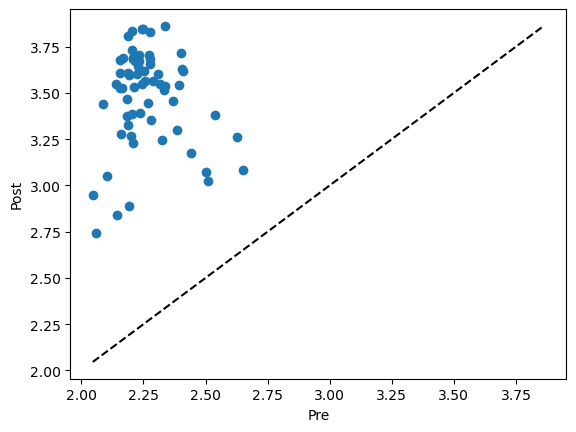

In [5]:
# get exponent
exp_pre = fg_pre.get_params('aperiodic_params', 'exponent')
exp_post = fg_post.get_params('aperiodic_params', 'exponent')

# plot difference in exponent
plt.scatter(exp_pre, exp_post)

# plot unity line
all_exp = np.concatenate((exp_pre, exp_post))
plt.plot([np.min(all_exp), np.max(all_exp)], [np.min(all_exp), np.max(all_exp)], 'k--')

# label axes
plt.xlabel('Pre')
plt.ylabel('Post')

### Aggregate results across all files

In [27]:
# create pandas DF
params = pd.DataFrame(columns = ['subject', 'array', 'channel', 'pre_exp', 'post_exp', 'pre_r2', 'post_r2'])
params.head()

,subject,array,channel,pre_exp,post_exp,pre_r2,post_r2


In [ ]:
subject = np.repeat('L_SNR_250717', len(exp_pre))
channel = np.linspace(0, len(exp_pre)-1, len(exp_pre))

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63.])

In [39]:
N_ARRAYS = 16
idx_nsp = 1
df_arraylist = []

for i_array in range(1, N_ARRAYS+1):
    # create dataframe
    df_array = pd.DataFrame(columns = ['subject', 'array', 'channel', 'pre_exp', 'post_exp', 'pre_r2', 'post_r2'])

    # import data
    fg_pre = FOOOFGroup()
    fg_post = FOOOFGroup()
    fg_pre.load(fr"G:\Shared drives\v1_v4_1024\data\lfp\lfp_params\L_SNR_250717\NSP{idx_nsp}_array{i_array}_LFP_pre.csv")
    fg_post.load(fr"G:\Shared drives\v1_v4_1024\data\lfp\lfp_params\L_SNR_250717\NSP{idx_nsp}_array{i_array}_LFP_post.csv")

    # get exponent and add it to dataframe
    pre_exp = fg_pre.get_params('aperiodic_params', 'exponent')
    post_exp = fg_post.get_params('aperiodic_params', 'exponent')
    df_array['pre_exp'] = pre_exp
    df_array['post_exp'] = post_exp

    #  get r squared and add it to dataframe
    pre_r2 = fg_pre.get_params('r_squared')
    post_r2 = fg_post.get_params('r_squared')
    df_array['pre_r2'] = pre_r2
    df_array['post_r2'] = post_r2
    
    # add subject, channel and array
    df_array['subject'] = subject
    df_array['channel'] = channel
    df_array['array'] = i_array

    # append df_array to params
    df_arraylist.append(df_array)

    # increment
    if i_array % 2 == 0:
        idx_nsp += 1

params = pd.concat(df_arraylist)
        

In [40]:
params.tail()

,subject,array,channel,pre_exp,post_exp,pre_r2,post_r2
59,L_SNR_250717,16,59.0,2.715783,2.398645,0.998055,0.997160
60,L_SNR_250717,16,60.0,2.644680,2.684672,0.996662,0.998135
61,L_SNR_250717,16,61.0,2.501490,2.845204,0.999045,0.998542
62,L_SNR_250717,16,62.0,2.393004,2.957392,0.998958,0.997082
63,L_SNR_250717,16,63.0,1.857365,2.869965,0.998862,0.997419


In [45]:
N_ARRAYS = 16
idx_nsp = 1
df_arraylist = []

for session in SESSIONS :
    for i_array in range(1, N_ARRAYS+1):
        # create dataframe
        df_array = pd.DataFrame(columns = ['subject', 'array', 'channel', 'pre_exp', 'post_exp', 'pre_r2', 'post_r2'])

        # import data
        fg_pre = FOOOFGroup()
        fg_post = FOOOFGroup()
        fg_pre.load(fr"G:\Shared drives\v1_v4_1024\data\lfp\lfp_params\{session}\NSP{idx_nsp}_array{i_array}_LFP_pre.csv")
        fg_post.load(fr"G:\Shared drives\v1_v4_1024\data\lfp\lfp_params\{session}\NSP{idx_nsp}_array{i_array}_LFP_post.csv")

        # get exponent and add it to dataframe
        pre_exp = fg_pre.get_params('aperiodic_params', 'exponent')
        post_exp = fg_post.get_params('aperiodic_params', 'exponent')
        df_array['pre_exp'] = pre_exp
        df_array['post_exp'] = post_exp

        #  get r squared and add it to dataframe
        pre_r2 = fg_pre.get_params('r_squared')
        post_r2 = fg_post.get_params('r_squared')
        df_array['pre_r2'] = pre_r2
        df_array['post_r2'] = post_r2
        
        # add subject, channel and array
        df_array['subject'] = subject
        df_array['channel'] = channel
        df_array['array'] = i_array

        # append df_array to params
        df_arraylist.append(df_array)
        # increment
        if i_array % 2 == 0:
            idx_nsp += 1

    params = pd.concat(df_arraylist)
    params.to_csv(fr'G:\Shared drives\v1_v4_1024\data\results\{session}_params_df.csv')